# Apply Naive Bayes algorithm on Optical recognition of handwritten digits dataset

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix,classification_report

In [3]:
d = load_digits()
d.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
print(d.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [9]:
d.data.shape

(1797, 64)

In [10]:
d.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [11]:
# display image behind the array/numbers
d.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

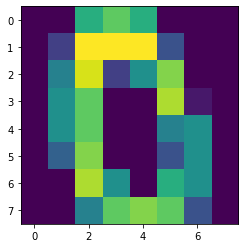

In [17]:
import matplotlib.pyplot as plt
plt.imshow(d.images[78])

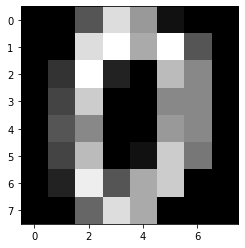

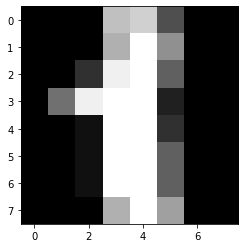

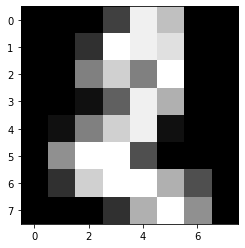

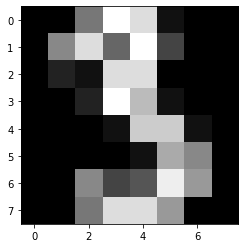

In [18]:
for i in range(4):
    plt.imshow(d.images[i])
    plt.gray()
    plt.show()

In [19]:
d.images[2]

array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
       [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
       [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
       [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0.],
       [ 0.,  1.,  8., 13., 15.,  1.,  0.,  0.],
       [ 0.,  9., 16., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  3., 13., 16., 16., 11.,  5.,  0.],
       [ 0.,  0.,  0.,  3., 11., 16.,  9.,  0.]])

## Lets create a dataset

In [24]:
X = pd.DataFrame(d.data,columns=d.feature_names)
X[:2]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [25]:
d.target

array([0, 1, 2, ..., 8, 9, 8])

In [26]:
# check unique targets
np.unique(d.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<AxesSubplot:>

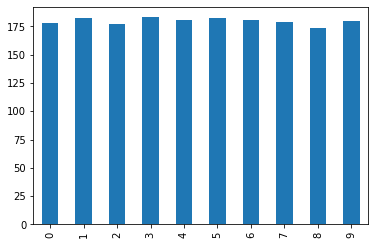

In [32]:
# check categorywise count
cnt = pd.Series(d.target).value_counts()
cnt.sort_index().plot(kind='bar')

In [33]:
# prepare y
y = d.target
y[:3]

array([0, 1, 2])

# spliting of dataset

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.8)

## Training phase

In [35]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [36]:
gnb.score(X_train,y_train)*100

87.40431454418929

In [37]:
gnb.score(X_test,y_test)*100

81.11111111111111

## Testing

In [39]:
X_test[:5]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1707,0.0,1.0,15.0,14.0,2.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,1.0,15.0,16.0,12.0,1.0,0.0,0.0
1617,0.0,0.0,5.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,15.0,15.0,1.0,0.0,0.0
816,0.0,0.0,2.0,10.0,14.0,9.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,0.0,14.0,15.0,10.0,0.0,0.0
704,0.0,0.0,2.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,0.0,3.0,13.0,16.0,13.0,1.0,0.0
1366,0.0,0.0,4.0,15.0,13.0,2.0,0.0,0.0,0.0,4.0,...,4.0,0.0,0.0,0.0,2.0,14.0,16.0,10.0,0.0,0.0


In [38]:
y_pred = gnb.predict(X_test)
y_pred[:5] #predicted

array([8, 5, 8, 6, 0])

In [40]:
y_test[:5] #actual

array([8, 5, 8, 6, 0])

In [41]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0,  0,  0,  1,  3,  3],
       [ 0,  1, 24,  1,  0,  0,  1,  0, 10,  0],
       [ 0,  0,  2, 24,  0,  0,  0,  0,  3,  1],
       [ 1,  0,  0,  0, 29,  1,  0,  8,  0,  0],
       [ 0,  0,  0,  2,  0, 31,  1,  2,  2,  0],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  3,  0,  0,  0,  1,  0,  2, 28,  0],
       [ 0,  2,  1,  4,  0,  0,  0,  7,  5, 24]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix of Digits Data')

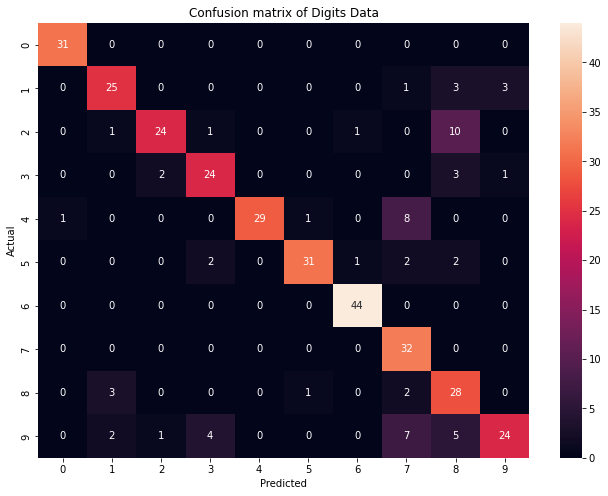

In [45]:
# plot CM
plt.figure(figsize=(11,8))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of Digits Data')

In [46]:
2+1+4+7+5+24 #last row of 9

43

In [47]:
sum(y_test == 9)

43

In [48]:
43-24 #missclassification

19

##### Assignment: Check Precision Recall F1_score Accuracy separetly

In [49]:
# check classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       0.81      0.78      0.79        32
           2       0.89      0.65      0.75        37
           3       0.77      0.80      0.79        30
           4       1.00      0.74      0.85        39
           5       0.94      0.82      0.87        38
           6       0.96      1.00      0.98        44
           7       0.62      1.00      0.76        32
           8       0.55      0.82      0.66        34
           9       0.86      0.56      0.68        43

    accuracy                           0.81       360
   macro avg       0.84      0.82      0.81       360
weighted avg       0.84      0.81      0.81       360



In [50]:
# now lets create another model
bn = BernoulliNB()
bn.fit(X_train,y_train)

BernoulliNB()

In [52]:
bn.score(X_train,y_train)*100

86.84759916492693

In [53]:
bn.score(X_test,y_test)*100

85.83333333333333

In [54]:
mul = MultinomialNB()
mul.fit(X_train,y_train)

MultinomialNB()

In [55]:
mul.score(X_train,y_train)*100

91.44050104384134

In [56]:
mul.score(X_test,y_test)*100

89.72222222222223